# Определение перспективного тарифа для телеком-компании

# Описание проекта
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Обзор данных

In [312]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

try:
    calls = pd.read_csv('datasets/calls.csv')
    internet = pd.read_csv('datasets/internet.csv')
    messages = pd.read_csv('datasets/messages.csv')
    tariffs = pd.read_csv('datasets/tariffs.csv')
    users = pd.read_csv('datasets/users.csv')

except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

In [313]:
display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица со звонками выглядит нормально, подаравим формат даты. 0 минут- это пропущенные звонки, их удалять не нужно.

In [314]:
display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица с использованием трафика выглядит нормально, подаравим формат даты и удалим неиформативный столбец 'Unnamed: 0'.

In [315]:
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица с отправкой сообщений выглядит нормально, подаравим формат даты.

In [316]:
display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица с описанием тарифов выглядит нормально, ничего делать не нужно.

In [317]:
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица с пользователями выглядит нормально, подаравим формат даты.

# Подготовка данных

In [318]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = calls['duration'].apply(np.ceil)

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True)

messages['session_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='ignore')

tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

display(calls.head())
display(internet.head())
display(messages.head())
display(users.head())
display(tariffs)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id,session_date
0,1000_0,2018-06-27,1000,2018-06-27
1,1000_1,2018-10-08,1000,2018-10-08
2,1000_2,2018-08-04,1000,2018-08-04
3,1000_3,2018-06-16,1000,2018-06-16
4,1000_4,2018-12-05,1000,2018-12-05


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Приведем в таблицах даты к нужному формату, удалим неинформативные столбцы, округлим секунды до минут в большую сторону, используем одинаковые названия столбцов с одинаковыми значениями в разных таблицах.

### Посчитайте для каждого пользователя:

-количество сделанных звонков и израсходованных минут разговора по месяцам

-количество отправленных сообщений по месяцам

-объем израсходованного интернет-трафика по месяцам

-помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### Количество звонков в месяц

In [319]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls_total = (
    calls
    .pivot_table(index=['user_id','month'], values='id', aggfunc='count')
    .reset_index()
    .fillna(0)
)
calls_total = calls_total.rename(columns={'id':'calls'})
display(calls_total.head())

,user_id,month,calls
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58


### Израсходованные минуты в месяц

In [320]:
calls_duration = (
    calls
    .pivot_table(index=['user_id','month'], values='duration', aggfunc='sum')
    .reset_index()
    .fillna(0)
)
display(calls_duration.head())

,user_id,month,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0


### Сообщений в месяц

In [321]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages_total = (
    messages
    .pivot_table(index=['user_id','month'], values='message_date', aggfunc='count')
    .reset_index()
    .fillna(0)
)
messages_total = messages_total.rename(columns={'message_date':'messages'})
display(messages_total.head(10))

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


### Гигабайт в месяц

In [322]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet['mb_used'] = internet['mb_used']/1024
internet_total = (
    internet
    .pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
    .reset_index()
    .fillna(0)
)
internet_total = internet_total.rename(columns={'mb_used':'gb_used'})
internet_total['gb_used'] = internet_total['gb_used'].apply(np.ceil)
display(internet_total.head())

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


### Помесячная выручка

In [323]:
data_total = calls_total.merge(calls_duration, on = ['user_id','month'], how='outer')
data_total = data_total.merge(messages_total, on = ['user_id','month'], how='outer')
data_total = data_total.merge(internet_total, on = ['user_id','month'], how='outer').fillna(0)
data_total = data_total.merge(users, on = ['user_id'], how='left')
data_total.drop(columns = ['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis = 1, inplace=True)
data_total = data_total.merge(tariffs, on = ['tariff'], how='inner')
data_total['mb_per_month_included'] = data_total['mb_per_month_included']/1024
data_total = data_total.rename(columns={'mb_per_month_included':'gb_per_month_included'})
display(data_total.sample(5))

,user_id,month,calls,duration,messages,gb_used,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1643,1145,4,55.0,348.0,60.0,7.0,Тюмень,smart,50,15.0,500,550,200,3,3
1671,1149,10,35.0,261.0,77.0,21.0,Мурманск,smart,50,15.0,500,550,200,3,3
2951,1439,9,62.0,487.0,10.0,28.0,Орёл,smart,50,15.0,500,550,200,3,3
680,1375,8,156.0,1087.0,59.0,19.0,Пенза,ultra,1000,30.0,3000,1950,150,1,1
274,1167,9,6.0,34.0,12.0,2.0,Кемерово,ultra,1000,30.0,3000,1950,150,1,1


Большая таблица со всей интересующей статистикой пользователей по месяцам.

In [324]:
#из тарифного плана вычитаем израсходованное
data_total['minutes_overrun'] = data_total['duration'] - data_total['minutes_included']
data_total['messages_overrun'] = data_total['messages'] - data_total['messages_included']
data_total['gb_used_overrun']  = data_total['gb_used'] - data_total['gb_per_month_included']
#если получилось меньше нуля, то и платить не нужно- заменяем на ноль 
data_total.loc[data_total['minutes_overrun'] < 0, 'minutes_overrun'] = 0
data_total.loc[data_total['messages_overrun'] < 0, 'messages_overrun'] = 0
data_total.loc[data_total['gb_used_overrun'] < 0, 'gb_used_overrun'] = 0
#прибавляем к стоимости тарифа переасход согласно тарифному плану
data_total['revenue'] = (data_total['rub_monthly_fee']
    + data_total['minutes_overrun'] * data_total['rub_per_minute']
    + data_total['messages_overrun'] * data_total['rub_per_message']
    + data_total['gb_used_overrun'] * data_total['rub_per_gb']
)
#столбцы для расчетов более не нужны
data_total.drop(columns = ['messages_included', 
                           'gb_per_month_included', 
                           'minutes_included', 
                           'rub_monthly_fee', 
                           'rub_per_gb', 
                           'rub_per_message', 
                           'rub_per_minute', 
                           'minutes_overrun', 
                           'messages_overrun', 
                           'gb_used_overrun'], 
                axis = 1, 
                inplace=True)

display(data_total.sample(10))
data_total.info()
print(data_total.duplicated().sum())

,user_id,month,calls,duration,messages,gb_used,city,tariff,revenue
3115,1480,7,67.0,471.0,31.0,20.0,Новокузнецк,smart,1550.0
2295,1285,11,56.0,365.0,98.0,9.0,Краснодар,smart,694.0
1599,1135,1,9.0,90.0,1.0,2.0,Архангельск,smart,550.0
2125,1247,8,66.0,489.0,31.0,23.0,Москва,smart,2150.0
2257,1280,10,91.0,619.0,44.0,20.0,Астрахань,smart,1907.0
1713,1158,8,53.0,339.0,64.0,15.0,Новокузнецк,smart,592.0
684,1375,12,124.0,858.0,75.0,22.0,Пенза,ultra,1950.0
115,1080,9,130.0,951.0,53.0,3.0,Москва,ultra,1950.0
1684,1155,1,44.0,337.0,48.0,20.0,Ставрополь,smart,1550.0
461,1276,12,50.0,361.0,29.0,29.0,Москва,ultra,1950.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   calls     3214 non-null   float64
 3   duration  3214 non-null   float64
 4   messages  3214 non-null   float64
 5   gb_used   3214 non-null   float64
 6   city      3214 non-null   object 
 7   tariff    3214 non-null   object 
 8   revenue   3214 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 251.1+ KB
0


Прекрасная чистая таблица с нужными значениями. 

# Анализ данных

In [325]:
data_pivot_smart_ultra = (
    data_total
    .pivot_table(index=['tariff'], values=['duration', 'messages', 'gb_used'], aggfunc=['mean',np.std])
    .reset_index()
)
display(data_pivot_smart_ultra)

tariff        mean                               std                     
            duration    gb_used   messages    duration   gb_used   messages
0  smart  417.934948  16.328847  33.384029  190.313730  5.747061  28.227876
1  ultra  526.623350  19.494416  49.363452  317.606098  9.853511  47.804457

Пользователи «Смарта» меньше общаются. Взглянем поподробнее.

### Сводная таблица по тарифу «Смарт»

In [326]:
data_pivot_smart = (
    data_total
    .query('tariff == "smart"')
    .pivot_table(index=['tariff','month'], values=['duration', 'messages', 'gb_used'], aggfunc=['mean', np.var, np.std])
    .reset_index()
)
display(data_pivot_smart)

tariff month        mean                                 var             \
                   duration    gb_used   messages      duration    gb_used   
0   smart     1  203.852941   8.735294  18.235294  23787.341355  39.412656   
1   smart     2  298.689655  11.844828  24.086207  36412.287961  37.150938   
2   smart     3  390.051948  15.233766  31.857143  36823.155161  32.549897   
3   smart     4  367.133929  13.625000  30.741071  34778.207127  31.299550   
4   smart     5  387.361702  15.907801  33.773050  34820.061094  34.370010   
5   smart     6  395.640244  15.951220  33.402439  30742.918861  31.911716   
6   smart     7  408.353234  15.875622  33.751244  32250.269602  33.419453   
7   smart     8  421.468085  16.736170  33.638298  34793.583379  30.041207   
8   smart     9  428.611538  16.392308  33.638462  33535.342723  25.884110   
9   smart    10  426.136054  16.880952  33.765306  35392.336375  32.897042   
10  smart    11  435.265823  17.000000  34.075949  31605.237050  27.180952   
11  smart    12  478.560831  18.201780  35.994065  39698.622033  29.786544   

                       std                       
      messages    duration   gb_used   messages  
0   262.367201  154.231454  6.277950  16.197753  
1   473.097701  190.820041  6.095157  21.750809  
2   718.492481  191.893604  5.705252  26.804710  
3   602.139559  186.489161  5.594600  24.538532  
4   730.990983  186.601343  5.862594  27.036845  
5   806.806374  175.336587  5.649046  28.404337  
6   799.887811  179.583601  5.780956  28.282288  
7   838.257501  186.530382  5.480986  28.952677  
8   790.617820  183.126576  5.087643  28.117927  
9   816.111966  188.128510  5.735594  28.567673  
10  805.937071  177.778618  5.213535  28.389031  
11  934.952346  199.245131  5.457705  30.576990

 В январе продолжительность звонков небольшая, удваивается к марту и продолжает медленный, но уверенный рост до конца года. Пропорционально растет количество сообщений и гигабайт интернета. 
 Стандартное отклонение довольно большое для минут и сообщений, это говорит о том, что среди пользователей большой разброс по времени бесед и количеству текстовых сообщений в месяц. А стандартное отклонение по интернет трафику, наоборот, небольшое, это показатель стабильности использования гигабайт среди пользователей.

duration


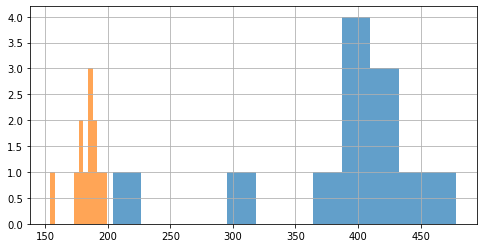

gb_used


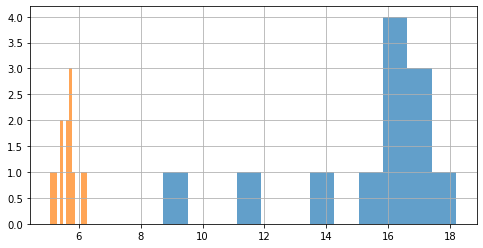

messages


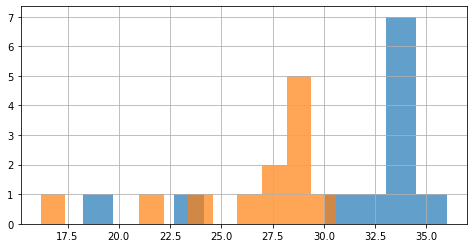

In [327]:
print('duration')
data_pivot_smart['mean', 'duration'].hist(bins=12, figsize=(8,4), alpha=0.7)
data_pivot_smart['std', 'duration'].hist(bins=12, figsize=(8,4), alpha=0.7)
plt.show()
print('gb_used')
data_pivot_smart['mean', 'gb_used'].hist(bins=12, figsize=(8,4), alpha=0.7)
data_pivot_smart['std', 'gb_used'].hist(bins=12, figsize=(8,4), alpha=0.7)
plt.show()
print('messages')
data_pivot_smart['mean', 'messages'].hist(bins=12, figsize=(8,4), alpha=0.7)
data_pivot_smart['std', 'messages'].hist(bins=12, figsize=(8,4), alpha=0.7)
plt.show()

Гистограммы позволяет судить о слеюущем:
1. Пользователи чаще разговаривают более 400 минут в месяц;
2. Пользователи используют более 16Гб интернета в месяц;
3. Пользователи отправляют около 34 сообщений в месяц;
4. Разброс данных по продолжительности разговора большой, 175-200 минут;
5. Разброс данных по использованию трафика небольшой, около 5-6Гб;
6. Разброс данных по сообщениям большой, около 29 сообщений.

### Сводная таблица по тарифу «Ультра»

In [328]:
data_pivot_ultra = (
    data_total
    .query('tariff == "ultra"')
    .pivot_table(index=['tariff','month'], values=['duration', 'messages', 'gb_used'], aggfunc=['mean', np.var, np.std])
    .reset_index()
)
display(data_pivot_ultra)

tariff month        mean                                  var              \
                   duration    gb_used   messages       duration     gb_used   
0   ultra     1  428.111111  13.222222  33.777778   72769.361111   44.444444   
1   ultra     2  297.125000  12.000000  21.958333   87919.679348  109.130435   
2   ultra     3  489.648649  17.648649  32.297297  111384.900901  114.345345   
3   ultra     4  458.018182  16.963636  31.563636   71653.870034   89.443098   
4   ultra     5  510.328358  19.373134  37.850746   83870.193578   95.631389   
5   ultra     6  479.702381  18.940476  41.726190   91535.946500   82.394005   
6   ultra     7  545.791209  20.505495  49.846154   94322.278144   96.430525   
7   ultra     8  510.775701  19.598131  48.439252   97956.496385  105.148298   
8   ultra     9  539.443478  19.243478  52.286957  105716.775286   86.255988   
9   ultra    10  558.081301  20.065041  58.430894  106464.583500   91.258030   
10  ultra    11  541.380597  19.805970  55.791045   96570.057064   93.796656   
11  ultra    12  592.805755  21.741007  60.611511  117276.331561  103.236784   

                        std                        
       messages    duration    gb_used   messages  
0    940.694444  269.757968   6.666667  30.670742  
1    716.824275  296.512528  10.446551  26.773574  
2   1732.381381  333.743765  10.693238  41.621886  
3   1407.287542  267.682405   9.457436  37.513831  
4   1624.644052  289.603511   9.779130  40.306874  
5   1986.297619  302.549081   9.077114  44.567899  
6   2372.042735  307.119322   9.819905  48.703621  
7   2171.739199  312.980026  10.254184  46.601923  
8   2152.855530  325.141162   9.287410  46.398874  
9   2697.181661  326.289110   9.552907  51.934398  
10  2476.948491  310.757232   9.684867  49.768951  
11  2681.978417  342.456321  10.160550  51.787821

 В феврале продолжительность звонков небольшая, в остальные месяцы наблюдается рост к концу года. Пропорционально растет количество сообщений и гигабайт интернета. 
 Стандартное отклонение довольно большое для всех значений, это говорит о том, что среди пользователей большой разброс по времени бесед, времени в сети и количеству текстовых сообщений в месяц.
 Средние показатели аналогичны тарифу 'smart', но немного больше.
 Отклонения в этом тарифе больше, что показывает большую разнородность предпочтений пользователей.

duration


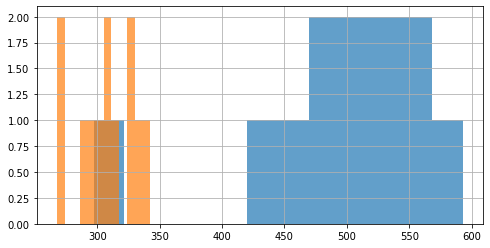

gb_used


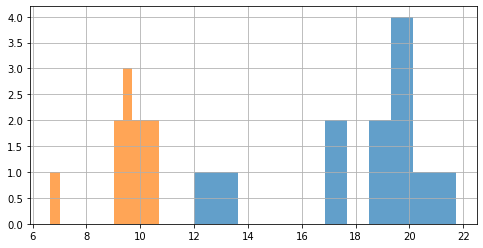

messages


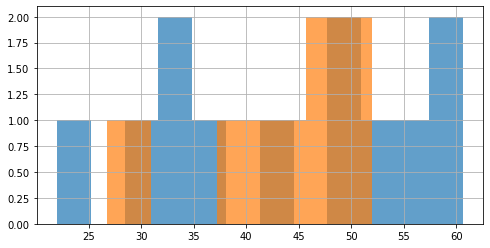

In [329]:
print('duration')
data_pivot_ultra['mean', 'duration'].hist(bins=12, figsize=(8,4), alpha=0.7)
data_pivot_ultra['std', 'duration'].hist(bins=12, figsize=(8,4), alpha=0.7)
plt.show()
print('gb_used')
data_pivot_ultra['mean', 'gb_used'].hist(bins=12, figsize=(8,4), alpha=0.7)
data_pivot_ultra['std', 'gb_used'].hist(bins=12, figsize=(8,4), alpha=0.7)
plt.show()
print('messages')
data_pivot_ultra['mean', 'messages'].hist(bins=12, figsize=(8,4), alpha=0.7)
data_pivot_ultra['std', 'messages'].hist(bins=12, figsize=(8,4), alpha=0.7)
plt.show()

Гистограммы позволяет судить о слеюущем:
1. Пользователи чаще разговаривают более 470 минут в месяц;
2. Пользователи используют более 19Гб интернета в месяц;
3. Пользователи чаще всего отправляют от 30 до 60 сообщений в месяц;
4. Разброс данных по продолжительности разговора большой, 1290-340 минут;
5. Разброс данных по использованию трафика большой, около 9-10Гб;
6. Разброс данных по сообщениям большой, 37-53 сообщений.

# Проверка гипотез

### Нулевая гипотеза 1:
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
### Альтернативная гипотеза 1:
Средняя выручка пользователей тарифов «Смарт» больше 2000.
### Альтернативная гипотеза 2:
Средняя выручка пользователей тарифов «Ультра» больше 2000.

In [330]:
smart_revenue = data_total.query('tariff == "smart"')['revenue']
ultra_revenue = data_total.query('tariff == "ultra"')['revenue']

alpha = .05
expected_average_revenue = 2000

results_1 = st.ttest_ind(smart_revenue, ultra_revenue, equal_var=False)
print(results_1.pvalue)

if results_1.pvalue < alpha:
    print("Не отвергаем нулевую гипотезу 1")
else:
    print("Отвергаем нулевую гипотезу 1") 

results_2 = st.ttest_1samp(smart_revenue, expected_average_revenue)
print(results_2.pvalue)
    
if (results_2.pvalue/2 < alpha) and (smart_revenue.mean() > expected_average_revenue):
    print("Отвергаем альтернативную гипотезу 1")
else:
    print("Не отвергаем альтернативную гипотезу 1")
    
results_3 = st.ttest_1samp(ultra_revenue, expected_average_revenue)
print(results_3.pvalue)
    
if (results_3.pvalue/2 < alpha) and (ultra_revenue.mean() > expected_average_revenue):
    print("Отвергаем альтернативную гипотезу 2")
else:
    print("Не отвергаем альтернативную гипотезу 2")

4.2606313931076085e-250
Не отвергаем нулевую гипотезу 1
6.789507404908489e-274
Не отвергаем альтернативную гипотезу 1
6.5829961937044456e-09
Отвергаем альтернативную гипотезу 2


 Вероятность получить одинаковые значения крайне низка.Довольно самонадеянно завялять о равенстве средних двух больших наборов данных, потому уровень статистической значимости 1%.
 Средняя выручка пользователей тарифов «Смарт» больше 2000.
 Средняя выручка пользователей тарифов «Ультра» меньше 2000.

### Нулевая гипотеза 2:
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
### Альтернативная гипотеза 3:
Средняя выручка пользователей из Москвы больше 2000.
### Альтернативная гипотеза 4:
Средняя выручка пользователей из других регионов больше 2000.

In [331]:
moscow_revenue = data_total.query('city == "Москва"')['revenue']
others_revenue = data_total.query('city != "Москва"')['revenue']

alpha = .05
expected_average_revenue = 2000

results_4 = st.ttest_ind(moscow_revenue, others_revenue, equal_var=False)
print(results_4.pvalue)

if results_4.pvalue < alpha:
    print("Не отвергаем нулевую гипотезу 2")
else:
    print("Отвергаем нулевую гипотезу 2") 


results_5 = st.ttest_1samp(moscow_revenue, expected_average_revenue)
print(results_5.pvalue)
    
if (results_5.pvalue/2 < alpha) and (moscow_revenue.mean() > expected_average_revenue):
    print("Отвергаем альтернативную гипотезу 3")
else:
    print("Не отвергаем альтернативную гипотезу 3")
    
results_6 = st.ttest_1samp(others_revenue, expected_average_revenue)
print(results_6.pvalue)
    
if (results_6.pvalue/2 < alpha) and (others_revenue.mean() > expected_average_revenue):
    print("Отвергаем альтернативную гипотезу 4")
else:
    print("Не отвергаем альтернативную гипотезу 4")

0.5257376663729298
Отвергаем нулевую гипотезу 2
4.903653213429928e-43
Не отвергаем альтернативную гипотезу 3
9.131679711673554e-170
Не отвергаем альтернативную гипотезу 4


 Средняя выручка пользователей из Москвы не сильно отличается от таковой из других городов. Уровень статистической значимости 5%, потому что небольшой разброс значений доспустим. 
 Средняя выручка по всем регионам выше 2000.

# Выводы
 Все клиенты меньше общаются в начале года и постепенно увеличивают количества трафика к концу года. Клиенты тарифа  «Ультра» больше общаются, но представляют из себя более разрозненную группу, у них больше разброс значений по звонкам, сообщениям и гигабайтам. Клиенты тарифа «Смарт» немного меньше общаются, так же по-разному используют минуты и сообщения, но более равномерно пользуются интернетом, рабзрос по количеству гигабайт в месяц небольшой.
 Средняя выручка по обоим тарифам различается, выручка пользователей тарифа «Смарт» больше, чем тарифа «Ультра», и больше 2000р. Пользователи тарифа «Ультра» приносят меньше 2000р в среднем в месяц.
 Клиенты из столицы и регионов приносят примерно одинаковое количество денег.
 
### Тариф «Смарт» более выгодный.